#### Assignment1 - Camera Calibration
#### Name: Anantha Lakshmi Yadavalli
#### Roll.No: 2020101103

In [2]:
from scipy.linalg import svd
import numpy as np
import random
import math
import cv2
import matplotlib.pyplot as plt

# Q1

#### Part 1

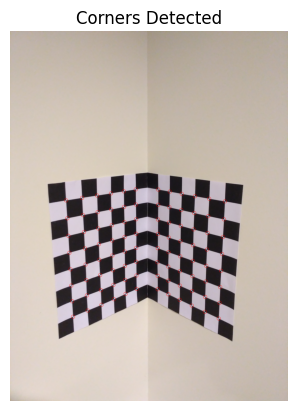

In [3]:

# Load the image
image = cv2.imread('calib-object.jpg')

# Split the image into two halves
height, width, _ = image.shape
half_width = width // 2
left_half = image[:, :half_width]
right_half = image[:, half_width:]

# Function to find chessboard corners
def find_chessboard_corners(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)
    if ret:
        corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001))
        return corners
    else:
        return None

# Find chessboard corners for each half
left_corners = find_chessboard_corners(left_half)
right_corners = find_chessboard_corners(right_half)

# Concatenate the corner arrays
if left_corners is not None and right_corners is not None:
    right_corners[:, :, 0] += half_width  # Shift x-coordinates of corners in the right half
    all_corners = np.concatenate((left_corners, right_corners), axis=0)
    
    # Draw the corners on the original image with red color and increased width
    image_with_corners = image.copy()  # Create a copy of the image
    for corner in all_corners:
        cv2.circle(image_with_corners, (int(corner[0][0]), int(corner[0][1])), 20, (0, 0, 255), 2)  # Draw red circles with size 10 and thickness 2

    # Plot the image with detected corners
    plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
    plt.title('Corners Detected')
    plt.axis('off')
    plt.show()
else:
    print("Chessboard corners not found in one or both halves.")


#### Part 2

In [4]:
def projection_matrix(X2,X3):    
    M=[]

    for index in range(len(X2)):
        (xw,yw,zw)=(X3[index][0],X3[index][1],X3[index][2])
        (x,y)=(X2[index][0],X2[index][1])

        col1=[xw,yw,zw,1,0,0,0,0,-x*xw,-x*yw,-x*zw,-x]
        col2=[0,0,0,0,xw,yw,zw,1,-y*xw,-y*yw,-y*zw,-y]

        M.append(col1)
        M.append(col2)
    
    M=np.array(M)    
    U, singular, V = svd(M)
    L = V[-1, :] / V[-1, -1]
    P = L.reshape(3, 4)
    P=np.array(P)
    return P

In [5]:
def Imgpoint(P,w_point):
    point=w_point[:]
    point.append(1)

    X=(np.array(point))
    X_new=np.matmul(P,X.T)
    X_new/=X_new[-1]
    img_point=X_new[:-1]
    
    return img_point       

In [6]:


img_points=[
    [2078,2062],[2067,2599],[2537,2972],[2046,3262],[2093,1679],[2434,1721],[1675,2771],[2056,3104],[2508,3500],[2231,2290],
    [440,1740],[453,1957],[1430,1793],[1302,2323],[1025,2763],[1145,1657],[1189,3190],[868,2821],[561,3478],[1014,2589]
]

w_points=[
    [4*28,-2*28,0],[4*28,-5*28,0],[7*28,-6*28,0],[4*28,-9*28,0],[4*28,0,0],[6*28,0,0],[28,-7*28,0],[28*4,-8*28,0],[7*28,-9*28,0],[5*28,-3*28,0],
    [0,0,28*7],[0,-28,28*7],[0,-28,28],[0,-4*28,28*2],[0,-6*28,4*28],[0,0,3*28],[0,-9*28,3*28],[0,-6*28,5*28],[0,-9*28,7*28],[0,-5*28,4*28]
]

P=projection_matrix(img_points,w_points)
print(P)
for index in range(len(w_points)):
    
    img_point=Imgpoint(P,w_points[index])
    error=math.dist(img_point,img_points[index])
    print("Error for each of the point {} is {}".format(img_points[index],error))

    

[[ 2.41878308e+00 -5.97330511e-01 -6.19376244e+00  1.55722673e+03]
 [-1.22746048e+00 -6.70810144e+00 -1.19573784e+00  1.60202663e+03]
 [-1.13872849e-03 -3.72516859e-04 -1.09699874e-03  1.00000000e+00]]
Error for each of the point [2078, 2062] is 6.228304863601377
Error for each of the point [2067, 2599] is 0.9100072937376256
Error for each of the point [2537, 2972] is 7.883387420578454
Error for each of the point [2046, 3262] is 3.3055773296729356
Error for each of the point [2093, 1679] is 2.3957871314431904
Error for each of the point [2434, 1721] is 7.7464576287579
Error for each of the point [1675, 2771] is 3.011198995405119
Error for each of the point [2056, 3104] is 3.568135940333311
Error for each of the point [2508, 3500] is 5.576539204739249
Error for each of the point [2231, 2290] is 3.499856397433604
Error for each of the point [440, 1740] is 3.5533710674777716
Error for each of the point [453, 1957] is 1.5059847464610165
Error for each of the point [1430, 1793] is 0.5415526

In [7]:
# Intrinsic matrix and Rotation matrix
P1=P[:,:-1]
R,K=np.linalg.qr(P1)

print("Projection matrix: \n",P)
print("Intrinsic matrix: \n",K)
print("Rotation matrix: \n",R)

P_centre=Imgpoint(P,[0,0,0])

print("Projection center Coordinates: {} ".format(P_centre))

Projection matrix: 
 [[ 2.41878308e+00 -5.97330511e-01 -6.19376244e+00  1.55722673e+03]
 [-1.22746048e+00 -6.70810144e+00 -1.19573784e+00  1.60202663e+03]
 [-1.13872849e-03 -3.72516859e-04 -1.09699874e-03  1.00000000e+00]]
Intrinsic matrix: 
 [[-2.71241076e+00 -2.50298258e+00  4.98215308e+00]
 [ 0.00000000e+00  6.25224015e+00  3.86918867e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.60837247e-03]]
Rotation matrix: 
 [[-8.91746604e-01 -4.52534877e-01  4.23468808e-04]
 [ 4.52534880e-01 -8.91746698e-01 -9.32406387e-05]
 [ 4.19821552e-04  1.08487383e-04  9.99999906e-01]]
Projection center Coordinates: [1557.2267335  1602.02663112] 


#### Part 3

In [8]:
def plot_wireframe(projections, image):
    '''
    projections: n_samples X 2 ((height * width) X 2D point coordinate)
    image: on which wireframe has to be plotted
    '''
    # Plotting image points on the image
    plt.scatter(projections[:, 0], projections[:, 1], color='r', s=13, lw=1)

    # This is plotting vertical lines
    # We are finding two points across which we want to join a line. For this we are finding the nth and n+6th point for every line
    # This can be changes with you use case
    for (u, v) in zip(range(0, 45,1 ), range(1, 45 , 1)):
        if((u+1)%9!=0):
            plt.plot([projections[u, 0], projections[v, 0]], [projections[u, 1], projections[v, 1]], color='r')

    for i in range(0,9):
        for (u, v) in zip(range(i, 45,9 ), range(i+9, 45 , 9)):
             plt.plot([projections[u, 0], projections[v, 0]], [projections[u, 1], projections[v, 1]], color='r')

    
    plt.imshow(image)
    plt.show()

[[ 984.48268183 1673.74701046]
 [1142.20221789 1653.99699312]
 [1289.59856511 1635.53967016]
 [1427.65312841 1618.25214771]
 [1557.2267335  1602.02663112]]


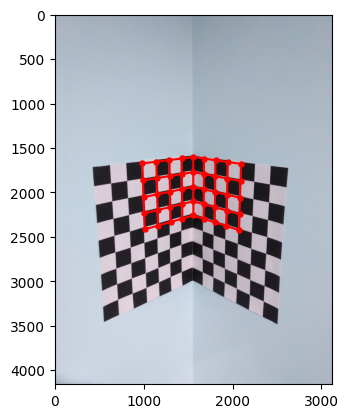

In [9]:
img = cv2.imread('calib-object.jpg')

points = [[0, 0, 112], [0, 0, 84], [0, 0, 56], [0, 0, 28], [0, 0, 0], [28, 0, 0], [56, 0, 0], [84, 0, 0], [112, 0, 0], [0, -28, 112], [0, -28, 84], [0, -28, 56], [0, -28, 28], [0, -28, 0], [28, -28, 0], [56, -28, 0], [84, -28, 0], [112, -28, 0], [0, -56, 112], [0, -56, 84], [0, -56, 56], [0, -56, 28], [0, -56, 0],
          [28, -56, 0], [56, -56, 0], [84, -56, 0], [112, -56, 0], [0, -84, 112], [0, -84, 84], [0, -84, 56], [0, -84, 28], [0, -84, 0], [28, -84, 0], [56, -84, 0], [84, -84, 0], [112, -84, 0], [0, -112, 112], [0, -112, 84], [0, -112, 56], [0, -112, 28], [0, -112, 0], [28, -112, 0], [56, -112, 0], [84, -112, 0], [112, -112, 0]]

wireframe_points = []

for w_point in points:
    wireframe_points.append(Imgpoint(P, w_point).tolist())

wireframe_points = np.array(wireframe_points)

print(wireframe_points[:5])
plot_wireframe(wireframe_points,img)

# print(wireframe_points)


#### Part 4

In [10]:
R = np.array([[-8.91746604e-01, -4.52534877e-01,  4.23468808e-04],
              [ 4.52534880e-01, -8.91746698e-01, -9.32406387e-05],
              [ 4.19821552e-04,  1.08487383e-04,  9.99999906e-01]])

# Calculate beta
beta = math.asin(-R[0, 2])

# Check if beta is not pi/2 or -pi/2
if abs(beta) != (math.pi / 2):
    alpha = math.atan2(R[1, 2], R[2, 2])
    gamma = math.atan2(R[0, 1], R[0, 0])
else:
    alpha = 0  # Can be chosen arbitrarily
    gamma = math.atan2(R[1, 0], R[1, 1])

# Convert angles to degrees
alpha_deg = math.degrees(alpha)
beta_deg = math.degrees(beta)
gamma_deg = math.degrees(gamma)

print("Euler Angles:")
print("Alpha:", alpha_deg)
print("Beta:", beta_deg)
print("Gamma:", gamma_deg)

Euler Angles:
Alpha: -0.005342295563308307
Beta: -0.02426297617899889
Gamma: -153.0935616836494


# Q2

#### Part 1

In [11]:
obj_points = [np.array([
   [4*28,-2*28,0],[4*28,-5*28,0],[7*28,-6*28,0],[4*28,-9*28,0],[4*28,0,0],[6*28,0,0],[28,-7*28,0],[28*4,-8*28,0],[7*28,-9*28,0],[5*28,-3*28,0],
    [0,0,28*7],[0,-28,28*7],[0,-28,28],[0,-4*28,28*2],[0,-6*28,4*28],[0,0,3*28],[0,-9*28,3*28],[0,-6*28,5*28],[0,-9*28,7*28],[0,-5*28,4*28]  
], dtype=np.float32)]
image_points = [np.array( [
    [2078,2062],[2067,2599],[2537,2972],[2046,3262],[2093,1679],[2434,1721],[1675,2771],[2056,3104],[2508,3500],[2231,2290],
    [440,1740],[453,1957],[1430,1793],[1302,2323],[1025,2763],[1145,1657],[1189,3190],[868,2821],[561,3478],[1014,2589] 
], dtype=np.float32)]


initial_mtx = np.array([[5.42345432e+02,0.00000000e+00 ,1.49935038e+03],
                        [0.00000000e+00 ,2.14456866e+03 ,1.90563360e+03],
                        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]], dtype=np.float32)
dist = np.zeros(4)
image_path = "calib-object.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, image_points, gray.shape[::-1],initial_mtx, dist,flags=(cv2.CALIB_USE_INTRINSIC_GUESS))

print("Final Camera Matrix:")
print(mtx)
print("\nDistortion Coefficients:")
print(dist)
final_rotational,_ = cv2.Rodrigues(rvecs[0])
print("\nRotational Matrix:")
print(final_rotational)
print("\nTranslational Coefficients:")
print(tvecs)

Final Camera Matrix:
[[3.77724227e+03 0.00000000e+00 1.62093325e+03]
 [0.00000000e+00 3.78338152e+03 1.98728913e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Coefficients:
[[ 1.05849347e+00]
 [-1.04501193e+01]
 [-4.64803754e-03]
 [ 7.74114615e-03]
 [ 2.88394062e+01]]

Rotational Matrix:
[[ 0.69390918  0.00211712 -0.72005942]
 [ 0.17238117 -0.97140587  0.16326471]
 [-0.6991243  -0.23741557 -0.6744324 ]]

Translational Coefficients:
(array([[-10.50410288],
       [-63.11240283],
       [628.03270103]]),)


In [12]:

# Rotational matrix
R = np.array([[ 0.69390918,  0.00211712, -0.72005942],
              [ 0.17238117, -0.97140587,  0.16326471],
              [-0.6991243,  -0.23741557, -0.6744324 ]])

# Translational coefficients
t = np.array([[-10.50410288],
              [-63.11240283],
              [628.03270103]])

# Final camera matrix
K = np.array([[3.77724227e+03, 0.00000000e+00, 1.62093325e+03],
              [0.00000000e+00, 3.78338152e+03, 1.98728913e+03],
              [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])


extrinsic_matrix = np.hstack((R, t))


P = np.dot(K, extrinsic_matrix)

print("Camera Projection Matrix P:")
print(P)


Camera Projection Matrix P:
[[ 1.48782926e+03 -3.76837916e+02 -3.81304878e+03  9.78322546e+05]
 [-7.37178389e+02 -4.14701240e+03 -7.22599491e+02  1.00930426e+06]
 [-6.99124300e-01 -2.37415570e-01 -6.74432400e-01  6.28032701e+02]]


[[ 997.76434722 1680.32467401]
 [1151.64340943 1660.20034712]
 [1295.67648302 1641.3636801 ]
 [1430.77926923 1623.69491741]
 [1557.75733362 1607.08870706]]


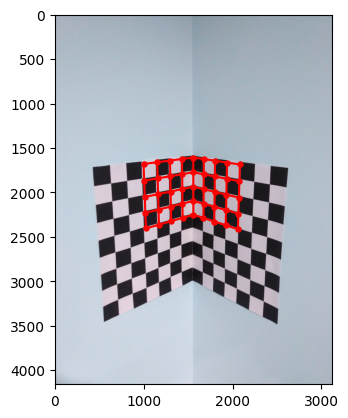

In [13]:
img = cv2.imread('calib-object.jpg')

points = [[0, 0, 112], [0, 0, 84], [0, 0, 56], [0, 0, 28], [0, 0, 0], [28, 0, 0], [56, 0, 0], [84, 0, 0], [112, 0, 0], [0, -28, 112], [0, -28, 84], [0, -28, 56], [0, -28, 28], [0, -28, 0], [28, -28, 0], [56, -28, 0], [84, -28, 0], [112, -28, 0], [0, -56, 112], [0, -56, 84], [0, -56, 56], [0, -56, 28], [0, -56, 0],
          [28, -56, 0], [56, -56, 0], [84, -56, 0], [112, -56, 0], [0, -84, 112], [0, -84, 84], [0, -84, 56], [0, -84, 28], [0, -84, 0], [28, -84, 0], [56, -84, 0], [84, -84, 0], [112, -84, 0], [0, -112, 112], [0, -112, 84], [0, -112, 56], [0, -112, 28], [0, -112, 0], [28, -112, 0], [56, -112, 0], [84, -112, 0], [112, -112, 0]]

wireframe_points = []

for w_point in points:
    wireframe_points.append(Imgpoint(P, w_point).tolist())

wireframe_points = np.array(wireframe_points)

print(wireframe_points[:5])
plot_wireframe(wireframe_points,img)

# print(wireframe_points)

#### part2

In [14]:

# # Load the image in grayscale
gray_image = cv2.cvtColor(cv2.imread("assi1.jpeg"), cv2.COLOR_BGR2GRAY)

# # Define world points
world_Points = [np.array([[0., 0., 0.], [1., 0., 0.], [2., 0., 0.], [3., 0., 0.], [4., 0., 0.], [0., 1., 0.], [1., 1., 0.], [2., 1., 0.], [3., 1., 0.], [4., 1., 0.], [0., 2., 0.], [1., 2., 0.], [2., 2., 0.], [3., 2., 0.], [4., 2., 0.], [0., 3., 0.], [1., 3., 0.], [2., 3., 0.], [3., 3., 0.], [4., 3., 0.], [0., 4., 0.], [1., 4., 0.], [2., 4., 0.], [3., 4., 0.], [4., 4., 0.]], dtype=np.float32)]
image_points = [np.array([[[420.61804, 398.8041]],
                          [[468.00168, 399.33405]],
                          [[515.5067, 399.61777]],
                          [[562.7577, 400.10767]],
                          [[610.32465, 400.66125]],
                          [[418.3722, 414.65207]],
                          [[466.85342, 415.13058]],
                          [[515.683, 415.60797]],
                          [[564.3567, 416.24615]],
                          [[613.0846, 416.72702]],
                          [[415.82996, 431.5559]],
                          [[465.69894, 431.92316]],
                          [[515.82544, 432.49594]],
                          [[565.7737, 433.06116]],
                          [[615.89246, 433.76056]],
                          [[413.26974, 449.64325]],
                          [[464.51666, 450.06168]],
                          [[516.14435, 450.54852]],
                          [[567.4781, 451.015]],
                          [[618.97687, 451.68362]],
                          [[410.4505, 468.47107]],
                          [[463.47687, 468.7566]],
                          [[516.2952, 469.42416]],
                          [[569.1796, 469.85492]],
                          [[622.21747, 470.5248]]], dtype=np.float32)]
      

In [15]:
# Helps in using the above randomly picked valued
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(world_Points, image_points, gray_image.shape[::-1],None,None)
rotation_matrix,_=cv2.Rodrigues(rvecs[0])
print("Camera Calibration Results:")
print("==========================")
print("Final Camera Matrix (mtx):")
print(mtx)
print("\nDistortion Coefficients (dist):")
print(dist)
print("\nRotation Matrix (rotation_matrix):")
print(rotation_matrix[0])
print("\nTranslation Vector (tvecs):")
print(tvecs[0])


Camera Calibration Results:
Final Camera Matrix (mtx):
[[1.54449089e+03 0.00000000e+00 5.10045618e+02]
 [0.00000000e+00 1.04881412e+03 5.16029623e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Coefficients (dist):
[[ 7.55769660e-01 -7.97127751e+01  2.74599832e-02  6.80377973e-03
   2.49482928e+03]]

Rotation Matrix (rotation_matrix):
[ 0.99980477  0.00173593 -0.01968278]

Translation Vector (tvecs):
[[-1.88904721]
 [-3.65541405]
 [32.40110731]]


In [16]:
extrinsic_matrix = np.hstack((rotation_matrix, tvecs[0]))
P = np.dot(mtx, extrinsic_matrix)
print("\nProjection Matrix:")
print(P)


Projection Matrix:
[[ 1.55074561e+03 -4.12329181e+02  2.66028867e+02  1.36084266e+04]
 [ 2.23721487e+01  1.89817687e+02  1.15315496e+03  1.28860813e+04]
 [ 1.28542385e-02 -8.13672915e-01  5.81180829e-01  3.24011073e+01]]


Projected 2D Image Points:
[[376 382]
 [654 385]
 [353 488]
 [680 491]]


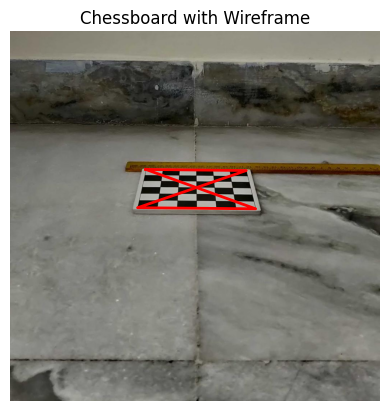

In [17]:
world_points = np.array([[-1.0, -1.0, 0.0],
                         [5.0, -1.0, 0.0],
                         [-1.0, 5.0, 0.0],
                         [5.0, 5.0, 0.0]])

projected_image_points, _ = cv2.projectPoints(world_points, rotation_matrix, tvecs[0], mtx, dist)
projected_image_points = np.squeeze(projected_image_points).astype(int)

# Reshape the projected 2D image points
projected_image_points_reshaped = projected_image_points.reshape(-1, 2)

# Display the projected 2D image points
print("Projected 2D Image Points:")
print("===========================")
print(projected_image_points_reshaped)
image = plt.imread('assi1.jpeg')

# Plot the image
plt.imshow(image)

# Create a closed loop of image points for wireframe
img_points_closed = np.vstack([projected_image_points_reshaped, projected_image_points_reshaped[0]])

# Plot the wireframe on the image
plt.plot(img_points_closed[:, 0], img_points_closed[:, 1], color='red', linewidth=2)

# Set title and turn off axis
plt.title('Chessboard with Wireframe')
plt.axis('off')

# Show the plot
plt.show()

## Part 3

In [18]:
rotation_matrix = np.asarray(rotation_matrix)

# Ensure 'tvecs' is a 3x1 array (column vector)
tvecs = np.asarray(tvecs).reshape(-1, 1)

# Compute the transformation matrix
extrinsic_matrix = np.hstack((rotation_matrix, tvecs))
transformation_matrix = np.dot(mtx, extrinsic_matrix)

# World origin in homogeneous coordinates
world_origin = np.array([[0], [0], [0], [1]])

# Project the world origin onto the image plane
image_coordinates_homogeneous = np.dot(transformation_matrix, world_origin)
image_coordinates = image_coordinates_homogeneous[:2] / image_coordinates_homogeneous[2]

# Display the image coordinates of the world origin
print("Image Coordinates of the World Origin:")
print(image_coordinates)

Image Coordinates of the World Origin:
[[419.9988123 ]
 [397.70496704]]


In [19]:
point1 = np.array([419.9988123, 397.70496704])
point2 = np.array([420.61804, 398.8041])

# Calculate the Euclidean distance
distance = np.linalg.norm(point2 - point1)

# Print the result
print("Euclidean distance between the two points:", distance)


Euclidean distance between the two points: 1.26156102040516


- Its very close values. Its near to my observations. 

# Q3

#### Part 1

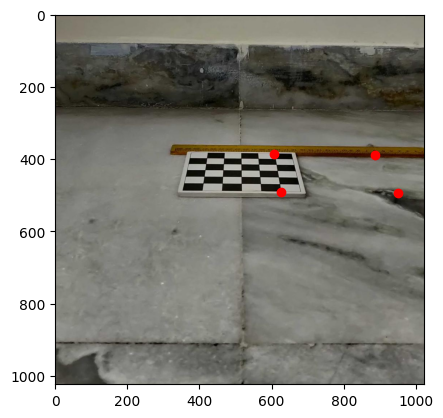

In [27]:
projection_matrix = np.array([[ 1.55074561e+03, -4.12329181e+02,  2.66028867e+02,  1.36084266e+04],
                              [ 2.23721487e+01,  1.89817687e+02,  1.15315496e+03,  1.28860813e+04],
                              [ 1.28542385e-02, -8.13672915e-01,  5.81180829e-01,  3.24011073e+01]])

world_points = np.array([[-1.0, -1.0, 0.0],
                         [5.0, -1.0, 0.0],
                         [-1.0, 5.0, 0.0],
                         [5.0, 5.0, 0.0]])
world_points[:, 0] = world_points[:, 0] + 5


img_points_cartesian = (projection_matrix @ np.hstack([world_points, np.ones((world_points.shape[0], 1))]).T).T[:, :2] / (projection_matrix @ np.hstack([world_points, np.ones((world_points.shape[0], 1))]).T).T[:, 2][:, None]

plt.scatter(img_points_cartesian[:, 0], img_points_cartesian[:, 1], color='red')
image = plt.imread('assi1.jpeg')
plt.imshow(image)
plt.show()


#### part2


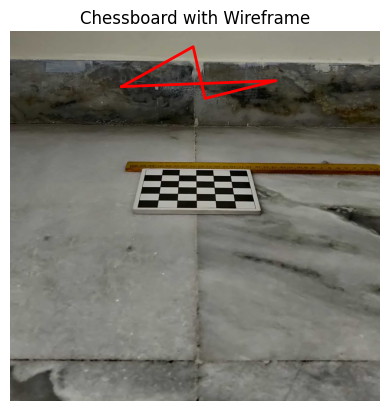

In [5]:
# Define your world points
import numpy as np
from scipy.linalg import svd
import random
import math
import cv2
import matplotlib.pyplot as plt
world_points = np.array([[4., -1., 0.],
                         [10., -1., 0.],
                         [4., 5., 0.],
                         [10., 5., 0.]])

# Extract rotation and translation vectors, camera matrix, and distortion coefficients
rvec = np.array([[ 0.41432665,  0.1225863 , -0.90183481]])
tvec = np.array([[-5.75394761],
                 [-29.18207928],
                 [58.79276217]])
mtx = np.array([[7.96640706e+03, 0.00000000e+00, 9.92458159e+02],
                [0.00000000e+00, 1.80977153e+03, 1.22027815e+03],
                [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
dist = np.array([[-1.02420975, -4.97583428, -0.21727943,  0.02655579, 10.79028169]])

# Ensure that the translation vector is correctly shaped
tvec = np.array([tvec[0][0], tvec[1][0], tvec[2][0]])

# Project 3D points to 2D image points
img_points_2d, _ = cv2.projectPoints(world_points, rvec, tvec, mtx, dist)

# Convert the projected points to integer format and reshape
img_points_2d = img_points_2d.squeeze().astype(np.int32)

# print(img_points_2d)


image = plt.imread('assign1.jpg')
plt.imshow(image)
img_points_closed = np.vstack([img_points_2d, img_points_2d[0]])
plt.plot(img_points_closed[:, 0], img_points_closed[:, 1], color='red', linewidth=2)  # Change color to red
plt.title('Chessboard with Wireframe')
plt.axis('off')
plt.show()
